## Context


This assignment is intended to stretch your data science skills and develop your programming through the use of
a mock census. Some of the contact time on the workshop will be spent on this project to help plan, think about,
and ultimately execute the assignment, but further personal study time will be essential to dedicate to this as
well. 

## Project Background Information

Every ten years, the United Kingdom undertakes a census of the population, with the most recent one having
been conducted in 2021. The purpose of such a census is to compare different people across the nation and to
provide the government with accurate statistics of the population to enable better planning, to develop policies,
and to allocate certain funding.
In the project, you will be provided with a mock census of an imaginary modest town. I would like you to
consider yourselves to be part of a local government team who will be making decisions on what to do with an
unoccupied plot of land and what to invest in. To address these questions, you will need to clean and analyse the
mock census data provided. 

1. Read in the data.

In [119]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [120]:
data = pd.read_csv('census06.csv')

In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8329 entries, 0 to 8328
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   8329 non-null   int64 
 1   Street                         8329 non-null   object
 2   First Name                     8329 non-null   object
 3   Surname                        8329 non-null   object
 4   Age                            8329 non-null   object
 5   Relationship to Head of House  8329 non-null   object
 6   Marital Status                 6273 non-null   object
 7   Gender                         8329 non-null   object
 8   Occupation                     8329 non-null   object
 9   Infirmity                      8329 non-null   object
 10  Religion                       6224 non-null   object
dtypes: int64(1), object(10)
memory usage: 715.9+ KB


In [122]:
data.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Scott Dale,Maureen,Cox,50,Head,Single,Female,"Engineer, building services",None,Catholic
1,1,Scott Dale,Rhys,Brown,52,Partner,Single,Male,"Engineer, mining",None,Catholic
2,2,Scott Dale,Lorraine,Allen,69,Head,Married,Female,Unemployed,None,Methodist
3,2,Scott Dale,Lewis,Allen,72,Husband,Married,Male,Retired Associate Professor,None,Methodist
4,3,Scott Dale,Molly,Patel,36,Head,Married,Female,"Engineer, land",None,None


In [123]:
data.isnull().sum()

House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House       0
Marital Status                   2056
Gender                              0
Occupation                          0
Infirmity                           0
Religion                         2105
dtype: int64

In [124]:
data = data.replace(' ', np.nan)
data.isnull().sum()

House Number                        0
Street                              0
First Name                          1
Surname                             1
Age                                 2
Relationship to Head of House       0
Marital Status                   2059
Gender                              0
Occupation                          0
Infirmity                           8
Religion                         2109
dtype: int64

In [125]:
data.shape

(8329, 11)

In [126]:
data['House Number'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [127]:
filt = data['House Number'].isna()
data[filt]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [128]:
data['Street'].unique()

array(['Scott Dale', 'Lee Shoal', 'Zebra Lodge', 'Holyrood Trace',
       'Edwards Mountain', 'Gold Road', 'Mason Roads', 'Peninsula Drive',
       'Leicesterbail Road', 'Hill Heights', 'Wessex Drive',
       'Pinewood Hills', 'Sheppard Way', 'Cumberlandbin Crescent',
       'Charity Road', 'Allen Mission', 'Wessex Crescent',
       'Bathhouse Fords', 'Spencer Keys', 'Armaghspan Avenue',
       'Landings Camp', 'Clearwater Street', 'Andrews Mill',
       'Hall Island', 'Davies Plains', 'Elvis Extensions',
       'Goldfinch Avenue', 'Edwards Drive', 'Castor Groves',
       'Solstice Lane', 'Dale Road', 'Riley Avenue', 'Bronze Crescent',
       'Elvis Via', 'Bishop Avenue', 'Portsmouth Street', 'Weston Inlet',
       'Guardian Crescent', 'Bathhouse Street', 'Parrot Summit',
       'Elizabeth Springs', 'Johnson Fort', 'Smith Plains', 'Rice Street',
       'Smith Shoal', 'Toucan Divide', 'Taylor Avenue', 'Williams Road',
       'Bronze Greens', 'Column Valley', 'Harrison Street', 'Khan Cre

In [129]:
street_filt=data['Street'].isna()
data[street_filt]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [130]:
data['First Name'].unique()

array(['Maureen', 'Rhys', 'Lorraine', 'Lewis', 'Molly', 'Norman',
       'Sophie', 'Jamie', 'Duncan', 'Natasha', 'Mohamed', 'Debra',
       'Annette', 'Gareth', 'Kyle', 'Alex', 'Denise', 'Brian', 'Tony',
       'Teresa', 'Pauline', 'Elliott', 'Max', 'Stacey', 'Gordon',
       'Kirsty', 'Adrian', 'Josh', 'Helen', 'Joe', 'John', 'Amy',
       'Eleanor', 'Joseph', 'Samuel', 'Stephanie', 'Carl', 'Paige',
       'Owen', 'Elizabeth', 'Robert', 'Alice', 'Derek', 'Frances',
       'Terence', 'Laura', 'Ashley', 'Abigail', 'Ronald', 'Diana', 'Sean',
       'Josephine', 'Diane', 'Philip', 'Caroline', 'Sharon', 'Leon',
       'Kayleigh', 'Francis', 'Janice', 'Jill', 'Adam', 'Jake', 'Liam',
       'Michelle', 'Melissa', 'Clifford', 'Bryan', 'Benjamin', 'Mitchell',
       'Cheryl', 'Bernard', 'Katy', 'Christine', 'Julian', 'Leonard',
       'Malcolm', 'Jacqueline', 'Carol', 'Stuart', 'Jemma', 'Ann',
       'Howard', 'Aimee', 'Sian', 'Clive', 'Jonathan', 'Albert', 'Sylvia',
       'Toby', 'Barry', 'A

In [131]:
data[data['First Name'].isnull()]



,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7258,10,Thomas Drive,NaN,Taylor,59,Head,Married,Male,Health and safety adviser,None,None


In [132]:
data.iloc[7258:7260]


,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7258,10,Thomas Drive,NaN,Taylor,59,Head,Married,Male,Health and safety adviser,None,None
7259,10,Thomas Drive,Kerry,Taylor,57,Wife,Married,Female,"Pilot, airline",None,None


In [133]:
#Since its only Mr Taylor with a missing first name, we could assign a random name to him to 
#make the data easier to work with 

data['First Name'] = data['First Name'].fillna('Unknown')

In [134]:
data.iloc[7258:7260]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7258,10,Thomas Drive,John,Taylor,59,Head,Married,Male,Health and safety adviser,None,None
7259,10,Thomas Drive,Kerry,Taylor,57,Wife,Married,Female,"Pilot, airline",None,None


In [135]:
data[data['Surname'].isnull()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5553,5,Gill Mews,Owen,NaN,8,Son,NaN,Male,Student,None,NaN


In [136]:
data.iloc[5550:5559]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5550,4,Gill Mews,Janet,Wilson,64,Head,Married,Female,Colour technologist,None,Christian
5551,4,Gill Mews,Justin,Wilson,66,Husband,Married,Male,Careers adviser,None,Christian
5552,5,Gill Mews,Joyce,Adams,32,Head,Divorced,Female,Unemployed,None,None
5553,5,Gill Mews,Owen,NaN,8,Son,NaN,Male,Student,None,NaN
5554,5,Gill Mews,Aaron,Adams,7,Son,NaN,Male,Student,None,NaN
5555,6,Gill Mews,Katie,Hudson,32,Head,Married,Female,"Engineer, technical sales",None,None
5556,6,Gill Mews,Brandon,Hudson,34,Husband,Married,Male,Firefighter,None,None
5557,6,Gill Mews,Marie,Thompson,21,Lodger,Single,Female,University Student,None,None
5558,7,Gill Mews,Donna,Brown-Hall,48,Head,Single,Female,"Scientist, audiological",None,Catholic


In [137]:
#We can assume that since his relationship to head of house is 'son', 
#and they live in the same house then he has the same surname as the head of house
data['Surname'] = data['Surname'].fillna('Adams')

In [138]:
data.iloc[5552:5555]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5552,5,Gill Mews,Joyce,Adams,32,Head,Divorced,Female,Unemployed,None,None
5553,5,Gill Mews,Owen,Adams,8,Son,NaN,Male,Student,None,NaN
5554,5,Gill Mews,Aaron,Adams,7,Son,NaN,Male,Student,None,NaN


In [139]:
data[data['Age'].isnull()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2206,17,Andrews Mill,Christopher,Johnson,NaN,Husband,Married,Male,Wellsite geologist,None,None
4317,47,Smith Plains,Hugh,Richards,NaN,Son,Single,Male,University Student,None,Christian


In [140]:
data.iloc[2200:2210]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2200,15,Andrews Mill,Nicholas,Holloway,23,Son,Single,Male,Commercial art gallery manager,None,Catholic
2201,15,Andrews Mill,Shane,Holloway,22,Son,Single,Male,University Student,None,Catholic
2202,15,Andrews Mill,Ashley,Holloway,21,Son,Single,Male,University Student,None,Catholic
2203,16,Andrews Mill,Wayne,Richardson,23,Head,Married,Male,Magazine journalist,None,None
2204,16,Andrews Mill,Kate,Richardson,21,Wife,Married,Female,University Student,None,None
2205,17,Andrews Mill,Sophie,Johnson,32,Head,Married,Female,Accounting technician,None,None
2206,17,Andrews Mill,Christopher,Johnson,NaN,Husband,Married,Male,Wellsite geologist,None,None
2207,17,Andrews Mill,Ronald,Johnson,3,Son,NaN,Male,Child,None,NaN
2208,18,Andrews Mill,Amber,Rowley,43,Head,Single,Female,Community education officer,None,None
2209,18,Andrews Mill,Daniel,Palmer,46,Partner,Single,Male,Applications developer,None,None


In [141]:
data.iloc[4310:4320]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4310,44,Smith Plains,Jacob,Lewis,28,Head,Married,Male,Tax inspector,None,Christian
4311,44,Smith Plains,Kimberley,Parker,27,Wife,Married,Female,"Editor, film/video",None,None
4312,45,Smith Plains,Jordan,Jones,50,Head,Married,Male,Adult guidance worker,None,Catholic
4313,45,Smith Plains,Bethany,Jones,45,Wife,Married,Female,Clothing/textile technologist,None,Catholic
4314,46,Smith Plains,Cheryl,May,72,Head,Single,Female,Retired Academic librarian,None,Methodist
4315,47,Smith Plains,Ellie,Richards,52,Head,Married,Female,Financial adviser,None,Christian
4316,47,Smith Plains,Guy,Richards,48,Husband,Married,Male,Insurance claims handler,None,None
4317,47,Smith Plains,Hugh,Richards,NaN,Son,Single,Male,University Student,None,Christian
4318,48,Smith Plains,Holly,Palmer,45,Head,Married,Female,Advertising account planner,None,Catholic
4319,48,Smith Plains,Iain,Palmer,51,Husband,Married,Male,Architect,None,Catholic


We can say for Christopher Johnson, his age is 3 years older than his wife because 
according to Wardrop, Murray (2 June 2009). The average age disparity between couples in the Uk is 3 years
For Hugh, we can assign him the average male university student age which is between 18-22 according to 
"https://www.hesa.ac.uk/news/17-01-2019/sb252-higher-education-student-statistics/numbers" 

In [142]:
data.loc[[2206, 4317], 'Age'] = [35, 20]

In [143]:
data.iloc[[2206, 4317]]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2206,17,Andrews Mill,Christopher,Johnson,35,Husband,Married,Male,Wellsite geologist,None,None
4317,47,Smith Plains,Hugh,Richards,20,Son,Single,Male,University Student,None,Christian


In [144]:
data['Age'].unique()

array(['50', '52', '69', '72', '36', '42', '38', '7', '29', '32', '62',
       '80', '56', '55', '25', '17', '63', '23', '22', '39', '41', '2',
       '1', '67', '65', '28', '27', '5', '4', '3', '20', '19', '49',
       '83.71794888354226', '14.0', '66', '82', '83', '44', '15', '21',
       '46', '45', '43', '64', '59', '34', '10', '9', '35', '0', '68',
       '48', '16', '81', '53', '8', '40', '51', '54', '58', '13', '61',
       '26', '47', '74', '79', '75', '70', '71', '102', '73', '24', '60',
       '30', '33', '11', '31', '61.61015620160364', '62.61015620160364',
       '15.0', '10.0', '18', '37', '12', '14', '6', '57', '89', '85',
       '78', '88', '91', '93', '97', '86', '77', '50.03241969022402',
       '51.03241969022402', '1.0', '90', '76', '104', '84', 35, '92',
       '87', '95', '98', '105', 20, '48.65904417229777',
       '50.65904417229777', '12.0', '54.55812337483672',
       '57.55812337483672', '3.0', '0.0', '106', '65.90982310589523',
       '68.90982310589523', '16

In [145]:
data['Age'] = data['Age'].astype('float')

In [146]:
data['Age'] = data['Age'].astype('int')

In [147]:
data['Age'].unique()

array([ 50,  52,  69,  72,  36,  42,  38,   7,  29,  32,  62,  80,  56,
        55,  25,  17,  63,  23,  22,  39,  41,   2,   1,  67,  65,  28,
        27,   5,   4,   3,  20,  19,  49,  83,  14,  66,  82,  44,  15,
        21,  46,  45,  43,  64,  59,  34,  10,   9,  35,   0,  68,  48,
        16,  81,  53,   8,  40,  51,  54,  58,  13,  61,  26,  47,  74,
        79,  75,  70,  71, 102,  73,  24,  60,  30,  33,  11,  31,  18,
        37,  12,   6,  57,  89,  85,  78,  88,  91,  93,  97,  86,  77,
        90,  76, 104,  84,  92,  87,  95,  98, 105, 106,  94, 101,  99])

In [148]:
data[data['Marital Status'].isnull()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7,4,Scott Dale,Jamie,Akhtar,7,Son,NaN,Male,Student,None,NaN
15,7,Scott Dale,Alex,O'Neill-Walker-Iqbal,17,Son,NaN,Male,Student,None,NaN
22,9,Scott Dale,Rhys,Smith,7,Son,NaN,Male,Student,None,NaN
23,9,Scott Dale,Max,Smith,2,Son,NaN,Male,Child,None,NaN
24,9,Scott Dale,Stacey,Smith,1,Daughter,NaN,Female,Child,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8310,1,Jones Barracks,Lydia,Stevenson,7,Daughter,NaN,Female,Student,None,NaN
8311,1,Jones Barracks,Debra,Stevenson,4,Daughter,NaN,Female,Child,None,NaN
8322,1,Walker Palace,Kenneth,Lane,3,Son,NaN,Male,Child,None,NaN
8323,1,Walker Palace,Victor,Lane,0,Son,NaN,Male,Child,None,NaN


In [149]:
# I want to ascertain that all individuals without Marital status are under 18 years of age

In [150]:
data[(data['Marital Status'].isna()) & (data['Age'] > 18)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4328,53,Smith Plains,Lynn,Hilton,52,Head,NaN,Female,Hospital doctor,None,Christian
7103,24,Ellis Mountain,Susan,Taylor,19,None,NaN,Female,University Student,None,Christian
7460,30,Freeman Trail,Adrian,King,20,None,NaN,Male,University Student,None,Christian


In [151]:
data.iloc[4328:4331]




,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4328,53,Smith Plains,Lynn,Hilton,52,Head,NaN,Female,Hospital doctor,None,Christian
4329,53,Smith Plains,Adrian,Hilton,53,Husband,Married,Male,"Accountant, chartered management",None,None
4330,53,Smith Plains,Laura,Hilton,27,Daughter,Single,Female,Facilities manager,None,Christian


In [152]:
data.iloc[7100:7105]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7100,22,Ellis Mountain,Ruth,Knight,73,Head,Widowed,Female,Retired Clinical cytogeneticist,None,None
7101,23,Ellis Mountain,Melissa,Warner,33,Head,Divorced,Female,Paediatric nurse,None,None
7102,24,Ellis Mountain,Andrew,Jennings,59,Head,Single,Male,"Civil engineer, consulting",None,None
7103,24,Ellis Mountain,Susan,Taylor,19,None,NaN,Female,University Student,None,Christian
7104,25,Ellis Mountain,Shannon,Hancock,82,Head,Widowed,Female,Retired Occupational hygienist,None,Christian


In [153]:
data.iloc[7455:7463]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7455,29,Freeman Trail,Josh,Elliott,6,Son,NaN,Male,Student,None,NaN
7456,29,Freeman Trail,Shirley,Elliott,2,Daughter,NaN,Female,Child,None,NaN
7457,29,Freeman Trail,Philip,Davidson,56,Lodger,Divorced,Male,Special effects artist,None,None
7458,30,Freeman Trail,Eleanor,Simpson,19,Head,Single,Female,University Student,None,None
7459,30,Freeman Trail,Thomas,Ball,22,None,Single,Male,University Student,None,Catholic
7460,30,Freeman Trail,Adrian,King,20,None,NaN,Male,University Student,None,Christian
7461,31,Freeman Trail,Sheila,James,28,Head,Married,Female,Retail merchandiser,None,None
7462,31,Freeman Trail,Gary,James,30,Husband,Married,Male,Physiotherapist,None,None


In [154]:
data.loc[[4328, 7103, 7460], 'Marital Status'] = ['Married', 'Single', 'Single']
#The first person is married as inferred from the household info

In [155]:
data[(data['Marital Status'].isna()) & (data['Age'] > 18)]
#Now that we've ensured that everyone with a marital status of NaN is below 
#18 and that is because they can't be legally married so we can go ahead and make them all single

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [156]:
data['Marital Status'] = data['Marital Status'].fillna('Single')

In [157]:
data[data['Marital Status'].isnull()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [158]:
data[data['Infirmity'].isnull()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
344,29,Gold Road,Joanna,Francis,65,Head,Single,Female,Clothing/textile technologist,NaN,Christian
462,13,Peninsula Drive,Lucy,Graham-Rogers,0,Daughter,Single,Female,Child,NaN,NaN
1284,182,Wessex Drive,Susan,Mills,50,Head,Single,Female,International aid/development worker,NaN,Christian
1587,9,Charity Road,Stewart,Brown,3,Son,Single,Male,Child,NaN,NaN
1630,18,Charity Road,Jade,Holmes,50,Head,Married,Female,Amenity horticulturist,NaN,None
1665,22,Charity Road,Adrian,Turner,6,Son,Single,Male,Student,NaN,NaN
7030,8,Naylor Crescent,Olivia,Porter,22,Head,Single,Female,University Student,NaN,None
8101,54,Kestrel Flat,Elizabeth,Singh,43,Head,Married,Female,Trading standards officer,NaN,Christian


In [159]:
data['Infirmity'].unique()

array(['None', 'Physical Disability', 'Mental Disability',
       'Unknown Infection', nan, 'Disabled', 'Blind', 'Deaf'],
      dtype=object)

Since we only have 8 NaN values, I replaced them with unknown infection.(The reason for this being that it’s better to wrongly classify them as having a disease and we later discover that they don’t have that ailment than the other way round)

In [160]:
data['Infirmity'] = data['Infirmity'].fillna('Unknown Infection')

In [161]:
data['Infirmity'].unique()

array(['None', 'Physical Disability', 'Mental Disability',
       'Unknown Infection', 'Disabled', 'Blind', 'Deaf'], dtype=object)

In [162]:
data[data['Infirmity'].isnull()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [163]:
data[data['Religion'].isnull()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7,4,Scott Dale,Jamie,Akhtar,7,Son,Single,Male,Student,None,NaN
15,7,Scott Dale,Alex,O'Neill-Walker-Iqbal,17,Son,Single,Male,Student,None,NaN
22,9,Scott Dale,Rhys,Smith,7,Son,Single,Male,Student,None,NaN
23,9,Scott Dale,Max,Smith,2,Son,Single,Male,Child,None,NaN
24,9,Scott Dale,Stacey,Smith,1,Daughter,Single,Female,Child,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8310,1,Jones Barracks,Lydia,Stevenson,7,Daughter,Single,Female,Student,None,NaN
8311,1,Jones Barracks,Debra,Stevenson,4,Daughter,Single,Female,Child,None,NaN
8322,1,Walker Palace,Kenneth,Lane,3,Son,Single,Male,Child,None,NaN
8323,1,Walker Palace,Victor,Lane,0,Son,Single,Male,Child,None,NaN


I want to ascertain that all individuals without Religion are under 18 years of age

In [164]:
data[(data['Religion'].isna()) & (data['Age'] > 18)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
927,86,Wessex Drive,Heather,Elliott,28,None,Single,Female,PhD Student,None,NaN
2433,7,Edwards Drive,Bryan,Browne,19,Husband,Married,Male,University Student,None,NaN
2666,17,Solstice Lane,Jeremy,Doyle,19,Husband,Married,Male,Merchant navy officer,None,NaN
2741,11,Dale Road,Stuart,Owen,21,None,Single,Male,University Student,None,NaN
3054,23,Riley Avenue,Katherine,Scott,25,Head,Single,Female,Unemployed,None,NaN
3653,39,Bishop Avenue,Elizabeth,Armstrong,19,Wife,Married,Female,University Student,None,NaN
6456,1,Gibbs Lane,Donna,Mitchell,85,Head,Divorced,Female,Retired Fast food restaurant manager,None,NaN
6824,53,July Isle,Leon,Marshall,23,None,Single,Male,"Programmer, multimedia",None,NaN
7573,12,Blackhook Lane,Mohamed,Stephens,51,Husband,Married,Male,"Programmer, multimedia",None,NaN


In [165]:
data['Religion'].mode()

0    None
Name: Religion, dtype: object

In [166]:
data.loc[[927, 2433, 2666, 2741, 3054, 3653, 6456, 6824, 7573], 'Religion'] = ['None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None']

In [167]:
data[(data['Religion'].isna()) & (data['Age'] < 11)]
#We can make the assumption that children 10 and below  have no religion just yet


,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7,4,Scott Dale,Jamie,Akhtar,7,Son,Single,Male,Student,None,NaN
22,9,Scott Dale,Rhys,Smith,7,Son,Single,Male,Student,None,NaN
23,9,Scott Dale,Max,Smith,2,Son,Single,Male,Child,None,NaN
24,9,Scott Dale,Stacey,Smith,1,Daughter,Single,Female,Child,None,NaN
30,12,Scott Dale,Joe,Taylor,5,Son,Single,Male,Student,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8310,1,Jones Barracks,Lydia,Stevenson,7,Daughter,Single,Female,Student,None,NaN
8311,1,Jones Barracks,Debra,Stevenson,4,Daughter,Single,Female,Child,None,NaN
8322,1,Walker Palace,Kenneth,Lane,3,Son,Single,Male,Child,None,NaN
8323,1,Walker Palace,Victor,Lane,0,Son,Single,Male,Child,None,NaN


In [168]:
#We are making the assumption that children below 10 have no religion just yet
religion_age_filt = data[(data['Religion'].isnull()) & (data['Age'] < 11)]
data.loc[religion_age_filt.index, 'Religion'] = 'None'


In [169]:
data[(data['Religion'].isna()) & (data['Age'] < 11)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [170]:
data['Religion'].unique()

array(['Catholic', 'Methodist', 'None', 'Christian', nan, 'Sikh',
       'Muslim', 'Jewish', 'Buddist', 'Quaker'], dtype=object)

The assumption here is that all children below the age of 11 have no religion and the remaining individuals, we just assign them the value of None as well

In [171]:
data['Religion'] = data['Religion'].fillna("None")


In [172]:
data[data['Religion'].isnull()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [173]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

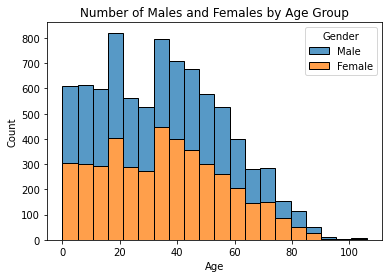

In [174]:
sns.histplot(data=data, x='Age', bins=20, hue='Gender', multiple='stack', hue_order=['Male', 'Female'])
#  labels and a title to the plot
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Number of Males and Females by Age Group')
plt.savefig('./Number of males and females by age group.png')
plt.show()


In [226]:
total_population = len(data)
unique_households = data.groupby(['House Number', 'Street'])

num_of_unique_households = len(unique_households)

avg_people_per_household = total_population / num_of_unique_households

print("Average number of people per household: {:.2f}".format(avg_people_per_household))


Average number of people per household: 2.95


In [227]:
max_people_in_household = data.groupby(['House Number', 'Street'])['House Number'].count().max()
print("The most amount of people in a single household is: ", max_people_in_household)

                                                                

The most amount of people in a single household is:  22


In [229]:
household_counts = data.groupby(['House Number', 'Street'])['House Number'].count()
max_count = household_counts.max()
max_household = household_counts[household_counts == max_count]


print("The following house(s) have the most amount of people:", list(max_household.index))


The following house(s) have the most amount of people: [(1, 'Jones Barracks'), (34, 'Toucan Divide')]


In [228]:
min_people_in_household = data.groupby(['House Number', 'Street'])['House Number'].count().min()
print("The min amount of people in a single household is: ", min_people_in_household)

The min amount of people in a single household is:  1


In [176]:
male_df = data.loc[data['Gender'] == 'Male']


In [177]:
female_df = data.loc[data['Gender'] == 'Female']

In [178]:
AgeClass = ['100+', '90-99', '80-89', '70-79', '60-69', '50-59', '40-49', '30-39', '20-29', '10-19', '0-9']

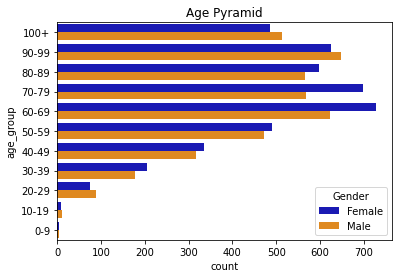

In [179]:
# combine the male and female dataframes
combined_df = pd.concat([male_df, female_df])

# create a new column that maps each age to its corresponding age group
combined_df['age_group'] = pd.cut(combined_df['Age'], bins=[0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 99, 200], labels=AgeClass)

# calculate the count of each age group and gender
age_gender_counts = combined_df.groupby(['age_group', 'Gender']).size().reset_index(name='count')

# create the age pyramid plot
age_pyramid = sns.barplot(x='count', y='age_group', hue='Gender', data=age_gender_counts, palette=['mediumblue', 'darkorange'])

# set the title of the plot
plt.title('Age Pyramid')

# show the plot
plt.show()

/tmp/ipykernel_45332/14819600.py:3: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  age_p['Gender'].cat.reorder_categories(['Male', 'Female'], inplace=True)  # reorder categories of Gender column


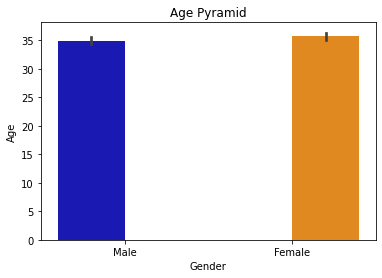

In [180]:
"""age_p = pd.concat([male_df, female_df])
age_p['Gender'] = age_p['Gender'].astype('category')  # convert Gender column to categorical variable for correct ordering
age_p['Gender'].cat.reorder_categories(['Male', 'Female'], inplace=True)  # reorder categories of Gender column
age_pyramid = sns.barplot(x='Gender', y='Age', data=age_p, order=['Male', 'Female'], hue='Gender', palette=['mediumblue', 'darkorange'])
age_pyramid.legend_.remove()  # remove the default legend
plt.title('Age Pyramid')
plt.show()"""


In [181]:
occup=data['Occupation'].unique()
print(occup)

['Engineer, building services' 'Engineer, mining' 'Unemployed' ...
 'Retired Multimedia programmer' 'Retired Commercial/residential surveyor'
 'Retired Control and instrumentation engineer']


(i) High-density housing. This should be built if the population is significantly expanding.
This is based on child birth rate

(ii) Low-density housing. This should be built if the population is “affluent” and there is
demand for large family housing.
Currently, no because we have 3 people per household on average.


(iii) Train station. There are potentially a lot of commuters in the town and building a train
station could take pressure off the roads. But how will you identify commuters?

Need to find a way to determine commuters

(iv) Religious building. There is already one place of worship for Catholics in the town. Is
there demand for a second Church (if so, which denomination?), or for a different religious building?


In [182]:
data['Religion'].unique()

array(['Catholic', 'Methodist', 'None', 'Christian', 'Sikh', 'Muslim',
       'Jewish', 'Buddist', 'Quaker'], dtype=object)

In [183]:
data['Religion'].value_counts()

None         4909
Christian    1781
Catholic      881
Methodist     547
Muslim        115
Sikh           55
Jewish         38
Quaker          2
Buddist         1
Name: Religion, dtype: int64

[Text(0, 0, 'Catholic'),
 Text(1, 0, 'Methodist'),
 Text(2, 0, 'None'),
 Text(3, 0, 'Christian'),
 Text(4, 0, 'Sikh'),
 Text(5, 0, 'Muslim'),
 Text(6, 0, 'Jewish'),
 Text(7, 0, 'Buddist'),
 Text(8, 0, 'Quaker')]

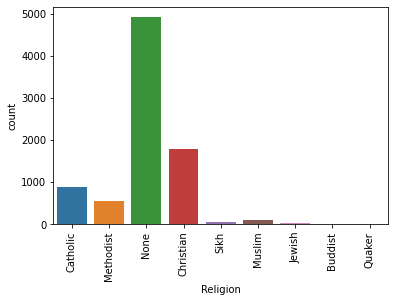

In [184]:
graph = sns.countplot(data=data,x='Religion' )
graph.set_xticklabels(graph.get_xticklabels(), rotation=90)

(v) Emergency medical building. Not a full hospital, but a minor injuries centre. This should
be built if there are many injuries or future pregnancies likely in the population. - Also dependent on cbr
(vi) Something else?

(i) Employment and training. If there is evidence for a lot of unemployment, we should re-
train people for new skills.

In [185]:
count_dict = data['Occupation'].value_counts().to_dict()

# sort the dictionary by value from highest to lowest
sorted_count_dict = dict(sorted(count_dict.items(), key=lambda item: item[1], reverse=True))

# print the sorted count dictionary
print(sorted_count_dict)

{'Student': 1669, 'University Student': 559, 'Unemployed': 513, 'Child': 500, 'Secretary, company': 16, 'Set designer': 15, 'PhD Student': 14, 'Engineer, manufacturing': 14, 'Brewing technologist': 14, 'Social research officer, government': 14, 'Bookseller': 14, 'TEFL teacher': 14, 'Metallurgist': 13, 'Careers information officer': 13, 'Surveyor, quantity': 13, 'Fast food restaurant manager': 13, 'Public house manager': 13, 'Catering manager': 13, 'Designer, ceramics/pottery': 12, 'Air cabin crew': 12, 'Pensions consultant': 12, 'Producer, television/film/video': 12, 'Academic librarian': 12, 'Scientific laboratory technician': 12, 'Radiation protection practitioner': 12, 'Horticulturist, amenity': 12, 'Surveyor, hydrographic': 12, 'Ergonomist': 12, 'Trade union research officer': 12, 'Youth worker': 12, 'Chief Operating Officer': 12, 'Armed forces technical officer': 12, 'Applications developer': 12, 'Medical sales representative': 12, 'Public librarian': 12, 'Designer, textile': 12, 

In [186]:
data.loc[data['Occupation'] == 'Unemployed', 'Occupation'].value_counts()


Unemployed    513
Name: Occupation, dtype: int64

ii) Old age care. If there is evidence for increasing numbers of retired people in future years,
the town will need to allocate more funding for end of life care.
(iii) Increase spending for schooling. If there is evidence of a growing population of school-
aged children (new births, or families moving in to the town), then schooling spend should increase.
(iv) General infrastructure. If the town is expanding, then services (waste collection; road
maintenance, etc.) will require more investment.

In [187]:
age = data['Age']

data[age.values == 0]


,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
67,25,Scott Dale,Janice,Murphy,0,Daughter,Single,Female,Child,None,None
90,8,Lee Shoal,Ann,Clarke,0,Daughter,Single,Female,Child,None,None
462,13,Peninsula Drive,Lucy,Graham-Rogers,0,Daughter,Single,Female,Child,Unknown Infection,None
659,17,Wessex Drive,Carol,Hale,0,Daughter,Single,Female,Child,None,None
666,19,Wessex Drive,Clifford,Faulkner,0,Son,Single,Male,Child,None,None
...,...,...,...,...,...,...,...,...,...,...,...
8070,36,Kestrel Flat,Duncan,Jenkins-Hardy,0,Grandson,Single,Male,Child,None,None
8126,5,Lloyd Drive,Henry,Hall,0,Son,Single,Male,Child,None,None
8189,20,Lloyd Drive,Claire,Anderson,0,Daughter,Single,Female,Child,None,None
8323,1,Walker Palace,Victor,Lane,0,Son,Single,Male,Child,None,None


In [188]:
data[(data['Gender'] == 'Female') & (data['Age'].isin([25, 26, 27, 28, 29]))]


,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
29,12,Scott Dale,Helen,Taylor,27,Wife,Married,Female,"Nurse, children's",None,Catholic
58,23,Scott Dale,Josephine,Parkin,29,Head,Single,Female,Speech and language therapist,None,None
87,8,Lee Shoal,Carol,Clarke,29,Head,Divorced,Female,Retail manager,None,None
133,7,Zebra Lodge,Aimee,Brown,25,Head,Single,Female,"Therapist, nutritional",None,Christian
150,21,Zebra Lodge,Suzanne,Ellis,25,Head,Single,Female,Advertising copywriter,None,None
...,...,...,...,...,...,...,...,...,...,...,...
8169,16,Lloyd Drive,Lydia,Wood,28,Head,Single,Female,"Surveyor, land/geomatics",None,Christian
8186,20,Lloyd Drive,Abbie,Anderson,28,Head,Married,Female,Unemployed,None,None
8200,24,Lloyd Drive,Melissa,Hall,29,Daughter,Divorced,Female,Visual merchandiser,None,Christian
8319,1,Jones Barracks,Eileen,Butler,27,Lodger,Single,Female,Armed forces technical officer,None,Catholic


In [189]:
cbr = (88/266)*100000
print(cbr)

33082.70676691729


In [190]:
data[(data['Gender'] == 'Female') & (data['Age'].isin([30, 31, 32, 33, 34]))]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
9,5,Scott Dale,Natasha,Walker,32,None,Single,Female,"Surveyor, minerals",None,Catholic
73,1,Lee Shoal,Michelle,Johnson,32,Daughter,Single,Female,Pensions consultant,None,None
139,12,Zebra Lodge,Jade,Taylor,32,Head,Single,Female,Learning disability nurse,None,None
160,26,Zebra Lodge,Mandy,Sanderson,30,Head,Single,Female,Civil Service fast streamer,None,None
178,3,Holyrood Trace,Dawn,Hill,32,Head,Single,Female,"Biochemist, clinical",None,None
...,...,...,...,...,...,...,...,...,...,...,...
8123,5,Lloyd Drive,Lauren,Hall,30,Head,Married,Female,"Engineer, structural",None,Catholic
8182,19,Lloyd Drive,Alison,Stewart,33,Head,Single,Female,Product/process development scientist,None,None
8236,1,Crawford Palace,Alison,Holt,34,Head,Married,Female,Volunteer coordinator,None,None
8244,1,Wood Keep,Geraldine,Whitehead-Manning,31,Daughter,Single,Female,"Therapist, occupational",Physical Disability,None


In [191]:
old_cbr = (100/333)*100000
print(old_cbr)

30030.03003003003


In [210]:
print(cbr - old_cbr)

3052.6767368872606


In [192]:
data[data['Age'].isin([56, 57, 58, 59, 60])]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
12,7,Scott Dale,Annette,Iqbal,56,Head,Single,Female,Commercial horticulturist,None,None
52,21,Scott Dale,Abigail,Bradley,59,Wife,Married,Female,Town planner,None,None
105,15,Lee Shoal,Craig,Ellis,58,Lodger,Single,Male,"Engineer, chemical",None,Methodist
136,9,Zebra Lodge,Charles,White,59,Head,Single,Male,Radiation protection practitioner,None,Christian
152,22,Zebra Lodge,Jayne,Smith,60,Head,Single,Female,Consulting civil engineer,None,None
...,...,...,...,...,...,...,...,...,...,...,...
8242,1,Wood Keep,Lawrence,Manning,60,Husband,Married,Male,"Loss adjuster, chartered",None,None
8246,1,Griffin Obervatory,Kerry,Holt,59,Head,Single,Female,"Designer, interior/spatial",None,Christian
8259,1,Wilson Castle,Harriet,Price,56,Cousin,Single,Female,Psychiatric nurse,None,None
8318,1,Jones Barracks,Hollie,Moore,58,Lodger,Divorced,Female,"Investment banker, corporate",None,None


In [193]:
data[data['Age'].isin([61, 62, 63, 64, 65])]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
10,5,Scott Dale,Mohamed,Slater,62,None,Single,Male,Clinical psychologist,None,Christian
16,8,Scott Dale,Denise,Ball,62,Head,Married,Female,Art gallery manager,None,Christian
17,8,Scott Dale,Brian,Ball,63,Husband,Married,Male,Quantity surveyor,None,None
26,10,Scott Dale,Kirsty,Hammond,65,Wife,Married,Female,"Secretary, company",None,Christian
51,21,Scott Dale,Ashley,Bradley,64,Head,Married,Male,"Administrator, arts",None,None
...,...,...,...,...,...,...,...,...,...,...,...
8198,23,Lloyd Drive,Glenn,Johnson,65,Head,Widowed,Male,Aid worker,None,Methodist
8208,26,Lloyd Drive,Howard,Jones,61,Husband,Married,Male,Town planner,None,None
8241,1,Wood Keep,Louise,Manning,61,Head,Married,Female,Tree surgeon,None,None
8279,1,White Granary,Stanley,Jones,63,Head,Single,Male,Proofreader,None,Christian


In [214]:
dr = ((429-352)/5)/100000
print(dr)# this is the dr for a five year period

0.0154


In [195]:
#This is to create a new age group column based on different age ranges
data.loc[data['Age']<11, 'Age group'] = 'Gen Alpha'
data.loc[data['Age'].between(11,26), 'Age group'] = 'Gen Z'
data.loc[data['Age'].between(27,42), 'Age group'] = 'Millennials'
data.loc[data['Age'].between(43,58), 'Age group'] = 'Gen X'
data.loc[data['Age'].between(59,77), 'Age group'] = 'Boomers'
data.loc[data['Age']>77, 'Age group'] = 'TSG'
#TSG is an abbreviation for the silent generation 
#Source: https://www.mentalfloss.com/article/609811/age-ranges-millennials-and-generation-z

<AxesSubplot: xlabel='Age group', ylabel='count'>

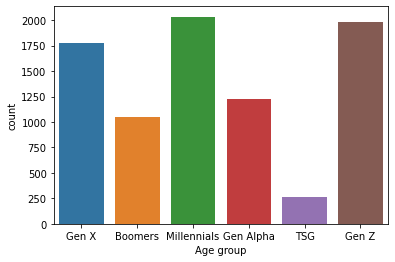

In [196]:
sns.countplot(data=data,x='Age group' )

Text(0.5, 1.0, 'Proportion of Age Group')

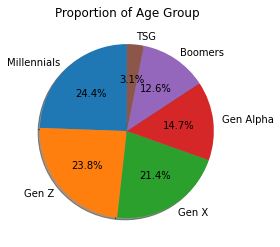

In [197]:
#Calculate the amount of each age group
Age_group_counts = data['Age group'].value_counts()
plt.pie(Age_group_counts, labels = Age_group_counts.index, autopct = '%1.1f%%', startangle=90, shadow = True)
#Add title
plt.title('Proportion of Age Group')

Text(0.5, 1.0, 'Proportion of Male and Female')

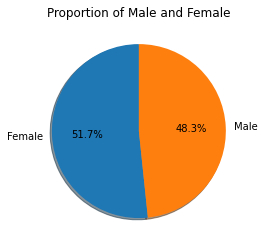

In [198]:
#Calculate the amount of males and females
Gender_counts = data['Gender'].value_counts()
plt.pie(Gender_counts, labels = Gender_counts.index, autopct = '%1.1f%%', startangle=90, shadow = True)
#Add title
plt.title('Proportion of Male and Female')

<AxesSubplot: xlabel='Marital Status', ylabel='count'>

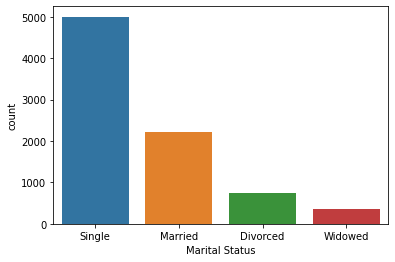

In [199]:
sns.countplot(data = data, x='Marital Status' )

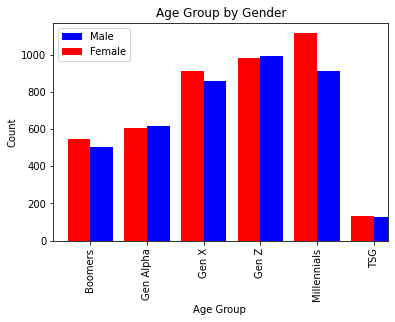

In [200]:
#Group data by age group and gender
grouped_data = data.groupby(['Age group', 'Gender'])['Age'].count()
grouped_data = grouped_data.unstack()

fig, ax = plt.subplots()
grouped_data ['Male'].plot(kind='bar', position=0, width=0.4, ax=ax,  color ='blue')
grouped_data ['Female'].plot(kind='bar', position=1, width=0.4, ax=ax,  color ='red')

ax.legend()
ax.set_xlabel('Age Group ')
ax.set_ylabel('Count')
ax.set_title('Age Group by Gender')

plt.show()

In [201]:
def categorize_occupation (Occupations):
    word = Occupations.split()
    if len(word) > 0:
        first_word = word[0]
        if first_word == 'Unemployed':
            return 0 #'Unemployed'
        elif first_word == 'Student':
            return 1#'Student'
        elif first_word == 'Child':
            return 2#'Child'
        elif first_word == 'Retired':
            return 3#'Retired'
    
    return 4#'Employed'
    
data['Employment Status'] = data['Occupation']. apply(categorize_occupation)
category_labels = {0.0:'Unemployed', 1.0:'Student', 2.0:'Child', 3.0:'Retired', 4.0:'Employed'}
data['Employment Status'] = data['Employment Status'].map(category_labels)
data.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age group,Employment Status
0,1,Scott Dale,Maureen,Cox,50,Head,Single,Female,"Engineer, building services",None,Catholic,Gen X,Employed
1,1,Scott Dale,Rhys,Brown,52,Partner,Single,Male,"Engineer, mining",None,Catholic,Gen X,Employed
2,2,Scott Dale,Lorraine,Allen,69,Head,Married,Female,Unemployed,None,Methodist,Boomers,Unemployed
3,2,Scott Dale,Lewis,Allen,72,Husband,Married,Male,Retired Associate Professor,None,Methodist,Boomers,Retired
4,3,Scott Dale,Molly,Patel,36,Head,Married,Female,"Engineer, land",None,None,Millennials,Employed


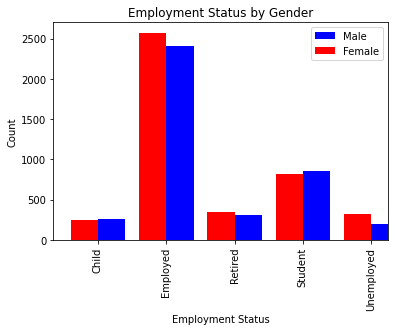

In [202]:
#Group data by Occupation category and gender
grouped_data = data.groupby(['Employment Status', 'Gender'])['Employment Status'].count()
grouped_data = grouped_data.unstack()

fig, ax = plt.subplots()
grouped_data ['Male'].plot(kind='bar', position=0, width=0.4, ax=ax,  color ='blue')
grouped_data ['Female'].plot(kind='bar', position=1, width=0.4, ax=ax,  color ='red')

ax.legend()
ax.set_xlabel('Employment Status')
ax.set_ylabel('Count')
ax.set_title('Employment Status by Gender')

plt.show()

In [207]:
data['Employment Status'].value_counts()

Employed      4981
Student       1669
Retired        656
Unemployed     513
Child          510
Name: Employment Status, dtype: int64

In [216]:
Commuters = (4981+1669)/8329
print(Commuters)

0.7984151758914636


In [209]:
unemployed_count = data[data['Employment Status'] == 'Unemployed'].count()
labour_force = data[data['Employment Status'] == 'Unemployed'].count() + data[data['Employment Status'] == 'Employed'].count()

unemployment_rate = (unemployed_count / labour_force)*100


print(unemployment_rate)


House Number                     9.337459
Street                           9.337459
First Name                       9.337459
Surname                          9.337459
Age                              9.337459
Relationship to Head of House    9.337459
Marital Status                   9.337459
Gender                           9.337459
Occupation                       9.337459
Infirmity                        9.337459
Religion                         9.337459
Age group                        9.337459
Employment Status                9.337459
dtype: float64


In [204]:
data['Gender'].value_counts()

Female    4302
Male      4027
Name: Gender, dtype: int64

In [206]:
data['Age group'].value_counts()

Millennials    2034
Gen Z          1983
Gen X          1779
Gen Alpha      1222
Boomers        1050
TSG             261
Name: Age group, dtype: int64